# House Prices: Advanced Regression Techniques

## Goal of the Project

Predict the price of a house by its features. If you are a buyer or seller of the house but you don't know the exact price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house.

## Import essential libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data Set

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
## concat train and test
df = pd.concat((train, test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
df.head(6)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009


In [7]:
df.tail(6)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1453,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006
1458,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,...,WD,0,Pave,9,996.0,AllPub,190,1993,1994,2006


# Exploratory Data Analysis (EDA)

In [8]:
# To show the all columns
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 85)

In [9]:
df.head(6)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,Ex,1.5Fin,6,1,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,Shed,700,10,Mitchel,30,5,5,Y,0,NaN,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009


In [10]:
df.tail(6)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1453,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,GdPrv,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1092,1,GasA,TA,2Story,2914,1,TA,Lvl,Gtl,1526,Inside,21.0,Reg,0,160,RM,0.0,None,NaN,0,6,MeadowV,34,5,4,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1092,1,GasA,Gd,2Story,2915,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,NaN,0,6,MeadowV,0,7,4,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,2916,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,NaN,0,4,MeadowV,24,5,4,Y,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,TA,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,2917,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,NaN,0,9,Mitchel,0,7,5,Y,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,NaN,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,970,0,GasA,TA,SFoyer,2918,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,Shed,700,7,Mitchel,32,5,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006
1458,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,LwQ,Unf,0.0,0.0,Gd,238.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,NaN,TA,1,PConc,2,Typ,650.0,3.0,TA,Fin,TA,Attchd,1993.0,2000,1,GasA,Ex,2Story,2919,1,TA,Lvl,Mod,9627,Inside,74.0,Reg,0,60,RL,94.0,BrkFace,NaN,0,11,Mitchel,48,5,7,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,9,996.0,AllPub,190,1993,1994,2006


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [12]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [13]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [14]:
df.select_dtypes(include=['object']).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [15]:
# Set index as Id column
df = df.set_index("Id")

In [16]:
df.head(6)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,Ex,1.5Fin,1,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,Shed,700,10,Mitchel,30,5,5,Y,0,NaN,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009


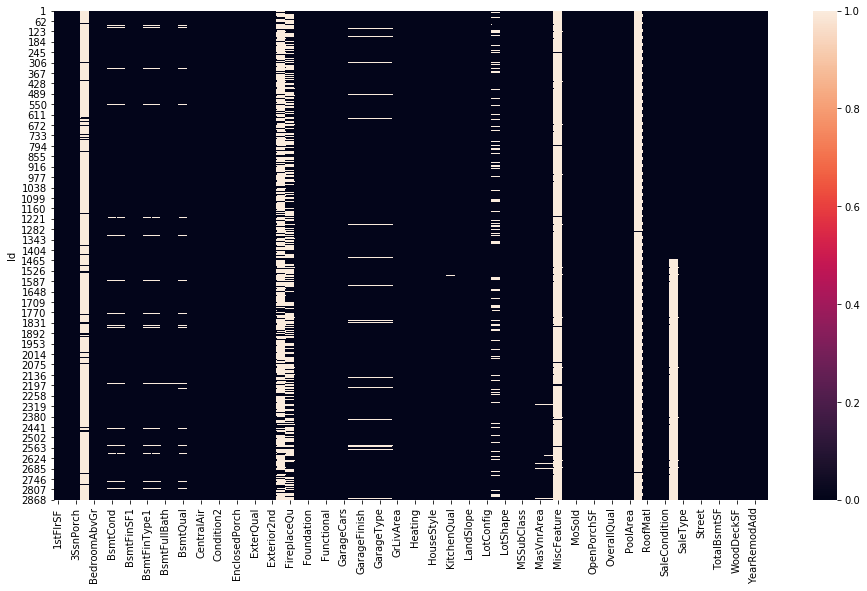

In [17]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [18]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.068517
GarageArea        0.034258
GarageCars        0.034258
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
GarageType        5.378554
G

In [19]:
col_for_drop = null_percent[null_percent > 20].keys() # if the null value % 20 or > 20 so need to drop it

In [20]:
# drop columns
df = df.drop(col_for_drop, "columns")
df.shape

(2919, 74)

In [21]:
# find the unique value count
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

1stFlrSF	1083
2ndFlrSF	635
3SsnPorch	31
BedroomAbvGr	8
BldgType	5
BsmtCond	5
BsmtExposure	5
BsmtFinSF1	992
BsmtFinSF2	273
BsmtFinType1	7
BsmtFinType2	7
BsmtFullBath	5
BsmtHalfBath	4
BsmtQual	5
BsmtUnfSF	1136
CentralAir	2
Condition1	9
Condition2	8
Electrical	6
EnclosedPorch	183
ExterCond	5
ExterQual	4
Exterior1st	16
Exterior2nd	17
Fireplaces	5
Foundation	6
FullBath	5
Functional	8
GarageArea	604
GarageCars	7
GarageCond	6
GarageFinish	4
GarageQual	6
GarageType	7
GarageYrBlt	104
GrLivArea	1292
HalfBath	3
Heating	6
HeatingQC	5
HouseStyle	8
KitchenAbvGr	4
KitchenQual	5
LandContour	4
LandSlope	3
LotArea	1951
LotConfig	5
LotFrontage	129
LotShape	4
LowQualFinSF	36
MSSubClass	16
MSZoning	6
MasVnrArea	445
MasVnrType	5
MiscVal	38
MoSold	12
Neighborhood	25
OpenPorchSF	252
OverallCond	9
OverallQual	10
PavedDrive	3
PoolArea	14
RoofMatl	8
RoofStyle	6
SaleCondition	6
SaleType	10
ScreenPorch	121
Street	2
TotRmsAbvGrd	14
TotalBsmtSF	1059
Utilities	3
WoodDeckSF	379
YearBuilt	118
YearRemodAdd	61
YrSold	5


In [22]:
# find unique values of each column
for i in df.columns:
    print("Unique value of:>>> {} ({})\n{}\n".format(i, len(df[i].unique()), df[i].unique()))

Unique value of:>>> 1stFlrSF (1083)
[ 856 1262  920 ... 1778 1650 1960]

Unique value of:>>> 2ndFlrSF (635)
[ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103


Unique value of:>>> HeatingQC (5)
['Ex' 'Gd' 'TA' 'Fa' 'Po']

Unique value of:>>> HouseStyle (8)
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Unique value of:>>> KitchenAbvGr (4)
[1 2 3 0]

Unique value of:>>> KitchenQual (5)
['Gd' 'TA' 'Ex' 'Fa' nan]

Unique value of:>>> LandContour (4)
['Lvl' 'Bnk' 'Low' 'HLS']

Unique value of:>>> LandSlope (3)
['Gtl' 'Mod' 'Sev']

Unique value of:>>> LotArea (1951)
[ 8450  9600 11250 ...  1894 20000 10441]

Unique value of:>>> LotConfig (5)
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique value of:>>> LotFrontage (129)
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 1

In [23]:
# Describe the target 
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

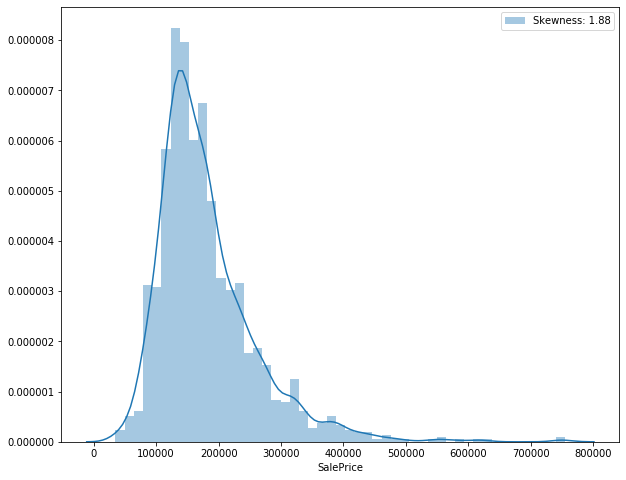

In [24]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(train["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(train['SalePrice'].skew())])

(38.0, 0.0)

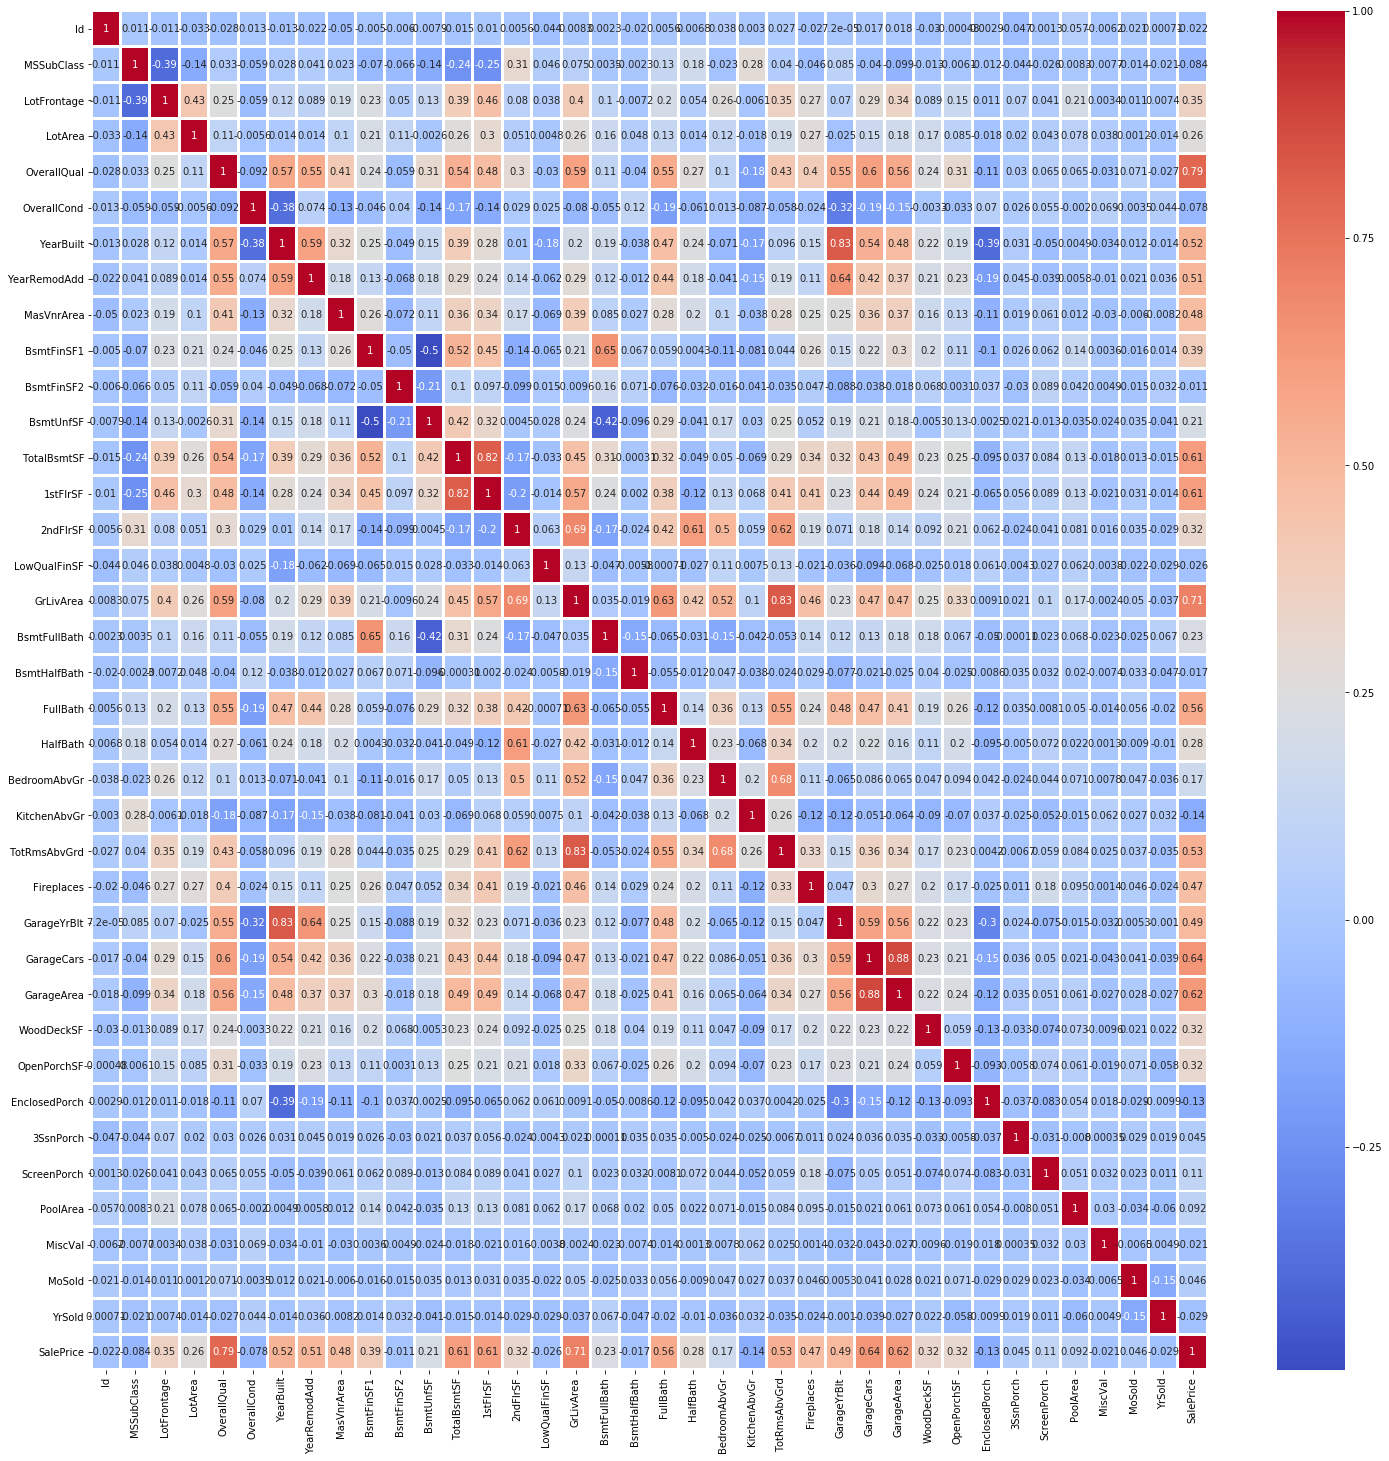

In [25]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]
hig_corr_features


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

(11.0, 0.0)

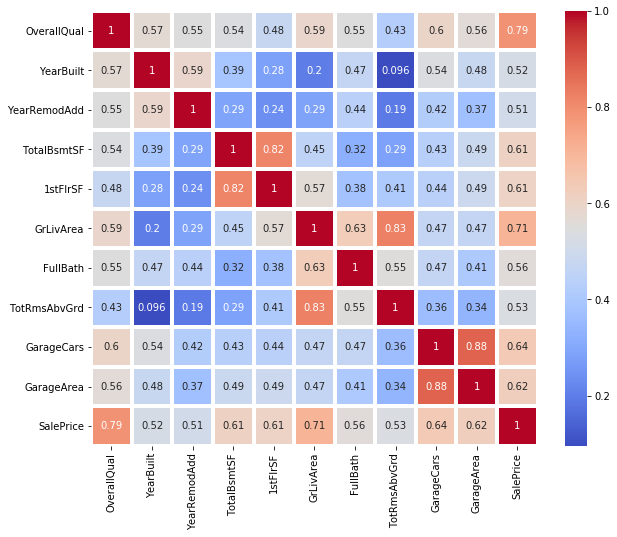

In [27]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

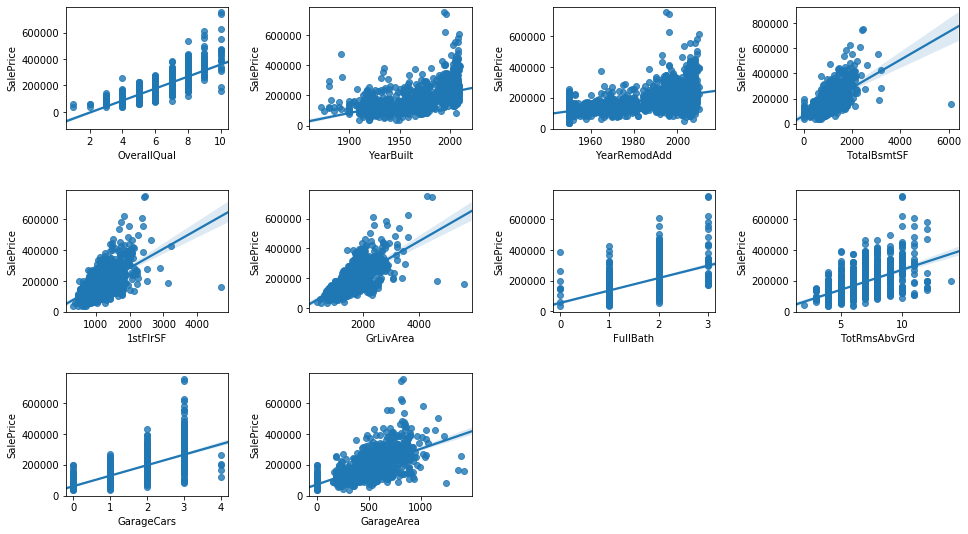

In [28]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=train, x = hig_corr_features[i], y = 'SalePrice')

# Handling Missing Value

In [29]:
missing_col = df.columns[df.isnull().any()]
missing_col

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

### Handling missing value of Bsmt feature 

In [30]:
bsmt_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
bsmt_feat = df[bsmt_col]
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
1,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,856.0
2,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,1262.0
3,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,920.0
4,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,756.0
5,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...
2915,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,546.0
2916,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,546.0
2917,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,1224.0


In [31]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinSF2      2918 non-null float64
BsmtFinType1    2840 non-null object
BsmtFinType2    2839 non-null object
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
BsmtQual        2838 non-null object
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [32]:
bsmt_feat.isnull().sum()

BsmtCond        82
BsmtExposure    82
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFinType1    79
BsmtFinType2    80
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual        81
BsmtUnfSF        1
TotalBsmtSF      1
dtype: int64

In [33]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2805,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2825,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [34]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]
bsmt_feat_all_nan

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
183,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
260,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
343,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
363,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [35]:
bsmt_feat_all_nan.shape

(79, 11)

In [36]:
qual = list(df.loc[:, df.dtypes == 'object'].columns.values)
qual

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [37]:
# Fillinf the mising value in bsmt features
for i in bsmt_col:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 'NA') # replace the NAN value by 'NA'
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 0) # replace the NAN value inplace of 0

bsmt_feat.update(bsmt_feat_all_nan) # update bsmt_feat df by bsmt_feat_all_nan
df.update(bsmt_feat_all_nan) # update df by bsmt_feat_all_nan

"""
>>> df = pd.DataFrame({'A': [1, 2, 3],
...                    'B': [400, 500, 600]})
>>> new_df = pd.DataFrame({'B': [4, 5, 6],
...                        'C': [7, 8, 9]})
>>> df.update(new_df)
>>> df
   A  B
0  1  4
1  2  5
2  3  6
"""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

"\n>>> df = pd.DataFrame({'A': [1, 2, 3],\n...                    'B': [400, 500, 600]})\n>>> new_df = pd.DataFrame({'B': [4, 5, 6],\n...                        'C': [7, 8, 9]})\n>>> df.update(new_df)\n>>> df\n   A  B\n0  1  4\n1  2  5\n2  3  6\n"

In [38]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
333,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,3206.0
949,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,936.0
1488,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
2041,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2186,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2218,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2219,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0
2349,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0
2525,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


In [39]:
bsmt_feat.shape

(9, 11)

In [40]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [41]:
pd.cut(range(0,1526),5) # create a bucket

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [42]:
df_slice = df[(df['BsmtFinSF2'] >= 305) & (df['BsmtFinSF2'] <= 610)]
df_slice

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27,900,0,0,3,1Fam,TA,Mn,234.0,486.0,BLQ,Rec,0.0,1.0,TA,180.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,0,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,2005.0,900,0,GasA,TA,1Story,1,Gd,Lvl,Gtl,7200,Corner,60.0,Reg,0,20,RL,0.0,None,0,5,NAmes,32,7,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,5,900.0,AllPub,222,1951,2000,2010
44,938,0,0,3,1Fam,TA,Av,280.0,491.0,LwQ,BLQ,1.0,0.0,Gd,167.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,0,CBlock,1,Typ,308.0,1.0,TA,Unf,TA,Detchd,1977.0,938,0,GasA,TA,1Story,1,TA,Lvl,Gtl,9200,CulDSac,NaN,IR1,0,20,RL,0.0,None,0,7,CollgCr,0,6,5,Y,0,CompShg,Hip,Normal,WD,0,Pave,5,938.0,AllPub,145,1975,1980,2008
45,1150,0,0,3,1Fam,TA,No,179.0,506.0,ALQ,BLQ,1.0,0.0,TA,465.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,0,CBlock,1,Typ,300.0,1.0,TA,RFn,TA,Attchd,1959.0,1150,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,7945,Inside,70.0,Reg,0,20,RL,0.0,None,0,5,NAmes,0,6,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1150.0,AllPub,0,1959,1959,2006
74,1086,0,0,3,1Fam,TA,No,320.0,362.0,ALQ,BLQ,1.0,0.0,TA,404.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,0,CBlock,1,Typ,490.0,2.0,TA,Unf,TA,Attchd,1989.0,1086,0,GasA,Gd,1Story,1,TA,Lvl,Gtl,10200,Inside,85.0,Reg,0,20,RL,104.0,BrkFace,0,5,NAmes,0,7,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1086.0,AllPub,0,1954,2003,2010
174,1362,0,0,3,1Fam,TA,No,288.0,374.0,ALQ,Rec,1.0,0.0,TA,700.0,Y,Norm,Norm,SBrkr,0,TA,TA,WdShing,Wd Shng,1,CBlock,1,Typ,504.0,2.0,TA,Unf,TA,Attchd,1961.0,1362,1,GasA,TA,1Story,1,TA,Lvl,Gtl,10197,Inside,80.0,IR1,0,20,RL,491.0,BrkCmn,0,6,NAmes,20,5,6,Y,0,CompShg,Gable,Normal,COD,0,Pave,6,1362.0,AllPub,0,1961,1961,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1141,0,0,3,1Fam,TA,Av,602.0,402.0,ALQ,Rec,1.0,0.0,TA,137.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,0,PConc,1,Typ,568.0,1.0,TA,Unf,TA,Attchd,1967.0,1141,0,GasA,Gd,SLvl,1,TA,Lvl,Gtl,9600,Inside,80.0,Reg,0,80,RL,140.0,BrkFace,0,7,NAmes,78,7,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1141.0,AllPub,0,1967,1967,2006
2807,1073,0,0,2,1Fam,Gd,Mn,510.0,373.0,GLQ,LwQ,1.0,0.0,Gd,190.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,0,PConc,2,Typ,246.0,1.0,TA,Unf,TA,Detchd,2004.0,1073,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,5500,Inside,50.0,Reg,0,20,RL,0.0,None,0,5,SWISU,120,5,7,Y,0,CompShg,Shed,Normal,WD,0,Pave,4,1073.0,AllPub,0,2004,2004,2006
2844,1282,0,0,3,1Fam,Gd,Av,595.0,400.0,ALQ,LwQ,0.0,1.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,0,CBlock,2,Typ,672.0,3.0,TA,Unf,Fa,Detchd,1989.0,1282,0,GasA,TA,SLvl,1,TA,Lvl,Gtl,10385,CulDSac,42.0,IR1,0,80,RL,123.0,BrkFace,0,4,CollgCr,0,6,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,995.0,AllPub,386,1978,1978,2006


In [43]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0] # replace NAN value of BsmtFinType2 by mode of buet ((305.0, 610.0)

In [44]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
333,TA,No,1124.0,479.0,GLQ,Rec,1.0,0.0,Gd,1603.0,3206.0
949,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,936.0
1488,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
2041,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2186,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2218,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2219,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0
2349,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0
2525,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


In [45]:
bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtExposure'].replace(np.nan, df[df['BsmtQual'] =='Gd']['BsmtExposure'].mode()[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan, df['BsmtCond'].mode()[0])
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan, df['BsmtQual'].mode()[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
df.update(bsmt_feat)

In [48]:
bsmt_feat.isnull().sum()

BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

### Handling missing value of Garage feature

In [49]:
df.columns[df.isnull().any()]

Index(['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'Utilities'],
      dtype='object')

In [50]:
garage_col = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',]
garage_feat = df[garage_col]
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
40,0.0,0.0,NaN,NaN,NaN,NaN,NaN
49,0.0,0.0,NaN,NaN,NaN,NaN,NaN
79,0.0,0.0,NaN,NaN,NaN,NaN,NaN
89,0.0,0.0,NaN,NaN,NaN,NaN,NaN
90,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2894,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2910,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2914,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [51]:
garage_feat.shape

(159, 7)

In [52]:
garage_feat_all_nan = garage_feat[(garage_feat.isnull() | garage_feat.isin([0])).all(1)]
garage_feat_all_nan.shape

(157, 7)

In [53]:
for i in garage_feat:
    if i in qual:
        garage_feat_all_nan[i] = garage_feat_all_nan[i].replace(np.nan, 'NA')
    else:
        garage_feat_all_nan[i] = garage_feat_all_nan[i].replace(np.nan, 0)
        
garage_feat.update(garage_feat_all_nan)
df.update(garage_feat_all_nan)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
2127,360.0,1.0,NaN,NaN,NaN,Detchd,NaN
2577,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [55]:
for i in garage_col:
    garage_feat[i] = garage_feat[i].replace(np.nan, df[df['GarageType'] == 'Detchd'][i].mode()[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
garage_feat.isnull().any()

GarageArea      False
GarageCars      False
GarageCond      False
GarageFinish    False
GarageQual      False
GarageType      False
GarageYrBlt     False
dtype: bool

In [57]:
df.update(garage_feat)

### Handling missing value of remain feature

In [58]:
df.columns[df.isnull().any()]

Index(['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
       'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'SaleType',
       'Utilities'],
      dtype='object')

In [59]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [60]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [61]:
df[df['MasVnrArea'].isnull() == True]['MasVnrType'].unique()

array(['None'], dtype=object)

In [62]:
df.loc[(df['MasVnrType'] == 'None') & (df['MasVnrArea'].isnull() == True), 'MasVnrArea'] = 0

In [63]:
df.isnull().sum()/df.shape[0] * 100

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtFinType1      0.000000
BsmtFinType2      0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
BsmtQual          0.000000
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.000000
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        0.000000
GarageFinish      0.000000
GarageQual        0.000000
GarageType        0.000000
GarageYrBlt       0.000000
GrLivArea         0.000000
HalfBath          0.000000
H

#### Handling missing value of LotFrontage feature

In [64]:
lotconfig = ['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
for i in lotconfig:
    df['LotFrontage'] = pd.np.where((df['LotFrontage'].isnull() == True) & (df['LotConfig'] == i) , df[df['LotConfig'] == i] ['LotFrontage'].mean(), df['LotFrontage'])

In [65]:
df.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType  

# Feature Transformation

In [66]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Sc

In [67]:
# converting columns in str which have categorical nature but in int64
feat_dtype_convert = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df[i] = df[i].astype(str)

In [68]:
df['MoSold'].unique() # MoSold = Month of sold

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [69]:
# conver in month abbrevation
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [70]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [71]:
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)

In [72]:
quan

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [73]:
len(quan)

30

In [74]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
obj_feat

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

## Conver categorical code into order

In [75]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [76]:
df['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [77]:
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes

In [78]:
df['BsmtExposure'].unique()

array([-1,  3,  1,  2,  0], dtype=int64)

In [79]:
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [80]:
df['Utilities'].unique()

array([ 3, -1], dtype=int64)

## Show skewness of feature with distplot

In [81]:
skewed_features = ['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [82]:
quan == skewed_features

False

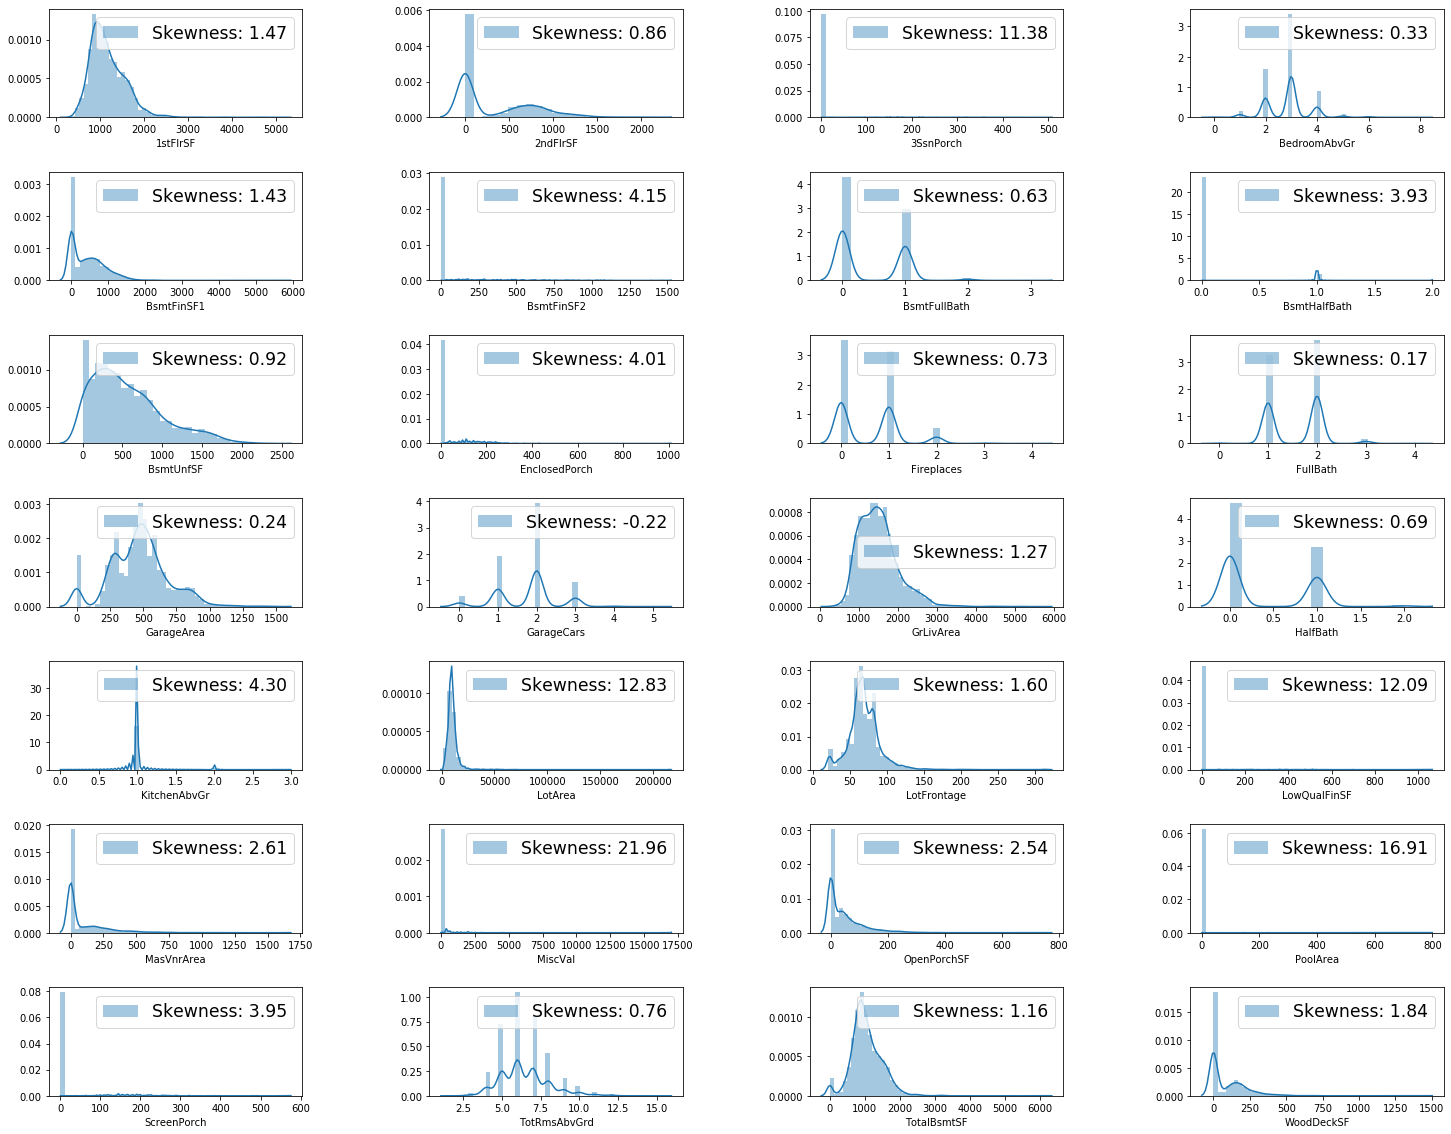

In [83]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [84]:
df_back = df

In [85]:
# decrease the skewnwnes of the data
for i in skewed_features:
    df[i] = np.log(df[i] + 1)

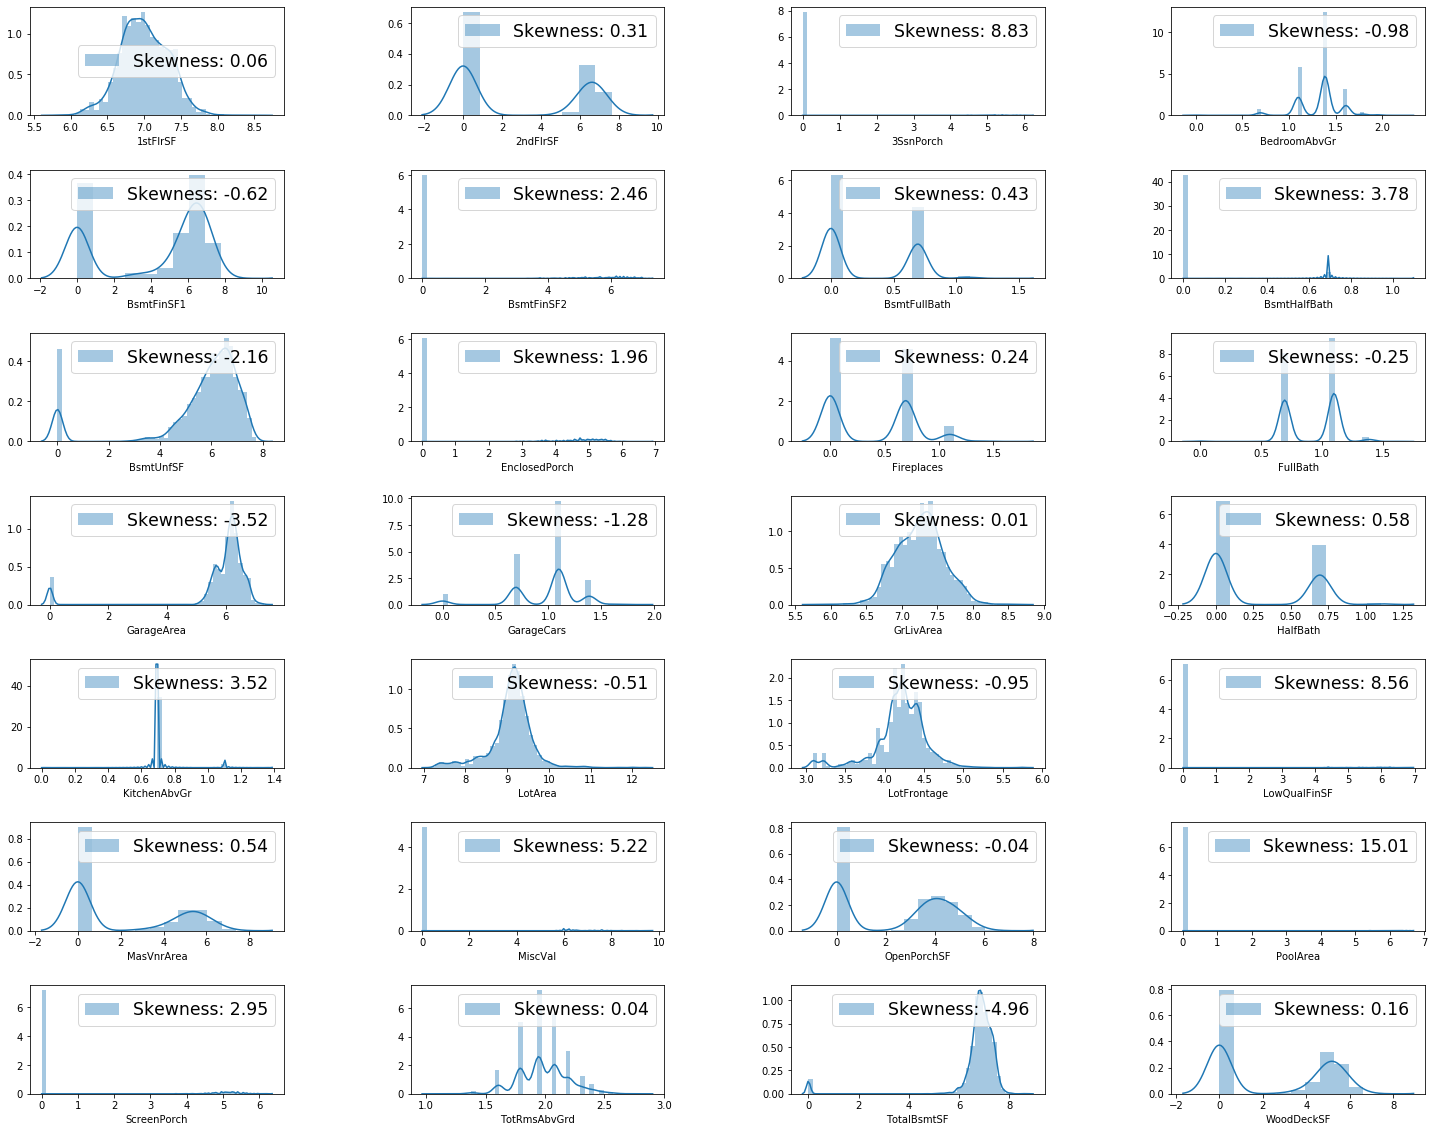

In [86]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [87]:
SalePrice = np.log(train['SalePrice'] + 1)

In [88]:
# get object feature to conver in numeric using dummy variable
obj_feat = list(df.loc[:,df.dtypes == 'object'].columns.values)
len(obj_feat)

29

In [89]:
# dummy varaibale
dummy_drop = []
clean_df = df
for i in obj_feat:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = obj_feat)
df = df.drop(dummy_drop, axis = 1)

In [90]:
df.shape

(2919, 500)

In [91]:
#sns.pairplot(df)

In [92]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

# Machine Learning Model Building

In [93]:
train_len = len(train)

In [94]:
X_train = df[:train_len]
X_test = df[train_len:]
y_train = SalePrice

print(X_train.shape)
print(X_test.shape)
print(len(y_train))

(1460, 500)
(1459, 500)
1460


# Cross Validation

In [95]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

# Linear Regression

In [96]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[-4.499253758245961e+19]

In [97]:
# Cross validation
cross_validation = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of XGBoost model =  [-3.59049263e+18 -2.69794256e+16 -5.01430840e+20 -1.24195688e+20
 -1.56157918e+20 -3.80303041e+20 -6.92624737e+20 -1.81535501e+20
 -1.18431954e+19 -8.96500637e+19]

Cross validation mean accuracy of XGBoost model =  -2.1413584565212335e+20


In [98]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.8646898178967032]

In [99]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8677128206058571]

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, y_train)
#test_model(lin_reg_2,X_poly)

import sklearn.linear_model as linear_model
lin_reg_2 = linear_model.LinearRegression()
#lin_reg_2.fit(X_poly, y_train)
test_model(lin_reg_2,X_poly)

# Support Vector Machine

In [100]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8897490696206058]

# Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.6977699373506714]

# Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8562626036810235]

 # Bagging & boosting

In [103]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [104]:
test_model(br_reg)

[0.8566634227077645]

In [105]:
test_model(gbr_reg)

[0.8814693894754249]

# XGBoost

In [106]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
test_model(xgb_reg)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:12:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:12:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[0.8841700820661896]

# SVM Model Bulding

In [107]:
svr_reg.fit(X_train,y_train)
y_pred = np.exp(svr_reg.predict(X_test)).round(2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [108]:
y_pred

array([116235.81, 159145.5 , 184603.73, ..., 175995.91, 115960.91,
       228554.78])

In [109]:
submit_test1 = pd.concat([test['Id'],pd.DataFrame(y_pred)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [110]:
submit_test1

,Id,SalePrice
0,1461,116235.81
1,1462,159145.50
2,1463,184603.73
3,1464,193132.57
4,1465,187963.37
...,...,...
1454,2915,89542.75
1455,2916,86121.81
1456,2917,175995.91
1457,2918,115960.91


In [111]:
submit_test1.to_csv('sample_submission.csv', index=False )

# SVM Model Bulding Hyperparameter Tuning 

# Hyperparameter Tuning 

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['linear', 'rbf', 'sigmoid'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}

rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_params_

In [112]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_

0.8931459336116102

In [113]:
svr_reg= SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg)

[0.8937335862549801]

In [114]:
svr_reg.fit(X_train,y_train)
y_pred = np.exp(svr_reg.predict(X_test)).round(2)

In [115]:
y_pred

array([113161.6 , 161976.13, 183930.61, ..., 175456.87, 118566.68,
       213315.75])

In [116]:
submit_test3 = pd.concat([test['Id'],pd.DataFrame(y_pred)], axis=1)
submit_test3.columns=['Id', 'SalePrice']

In [117]:
submit_test3.to_csv('sample_submission.csv', index=False)
submit_test3

,Id,SalePrice
0,1461,113161.60
1,1462,161976.13
2,1463,183930.61
3,1464,194015.66
4,1465,189543.69
...,...,...
1454,2915,89490.38
1455,2916,80618.90
1456,2917,175456.87
1457,2918,118566.68


Name
Submitted
Wait time
Execution time
Score
sample_submission.csv
3 days ago
0 seconds
0 seconds
0.12612

# XGBoost parameter tuning

xgb2_reg = xgboost.XGBRegressor()
params_xgb = {
    'max_depth': range(2, 20, 2),
    'n_estimators': range(99, 2001, 80),
    'learning_rate': [0.2, 0.1, 0.01, 0.05],
    'booster': ['gbtree'],
    'mon_child_weight': range(1, 8, 1)
}
rand_search_xgb = RandomizedSearchCV(estimator = xgb2_reg, 
                                     param_distributions=params_xgb, 
                                     n_iter=100, n_jobs=-1, cv=11, verbose=11, 
                                     random_state=51, return_train_score =True, scoring='neg_mean_absolute_error')
rand_search_xgb.fit(X_train,y_train)

rand_search_xgb.best_score_

rand_search_xgb.best_params_

In [118]:
xgb2_reg=xgboost.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

test_model(xgb2_reg)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:13:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:14:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[0.8899316609591396]

In [119]:
xgb2_reg.fit(X_train,y_train)
y_pred_xgb_rs=xgb2_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:14:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [120]:
np.exp(y_pred_xgb_rs).round(2)

array([123535.19, 169676.48, 190203.95, ..., 154335.52, 118554.99,
       211244.77], dtype=float32)

In [121]:
y_pred_xgb_rs = np.exp(xgb2_reg.predict(X_test)).round(2)
xgb_rs_solution = pd.concat([test['Id'], pd.DataFrame(y_pred_xgb_rs)], axis=1)
xgb_rs_solution.columns=['Id', 'SalePrice']
xgb_rs_solution.to_csv('sample_submission.csv', index=False)

In [122]:
xgb_rs_solution

,Id,SalePrice
0,1461,123535.187500
1,1462,169676.484375
2,1463,190203.953125
3,1464,192006.062500
4,1465,191240.359375
...,...,...
1454,2915,81919.148438
1455,2916,81223.296875
1456,2917,154335.515625
1457,2918,118554.992188


1603
0.12484
2
1d
Your Best Entry 
Your submission scored 0.12484, which is an improvement of your previous score of 0.12612. Great job!
Tweet this!

# Feature Engineering / Selection to improve accuracy

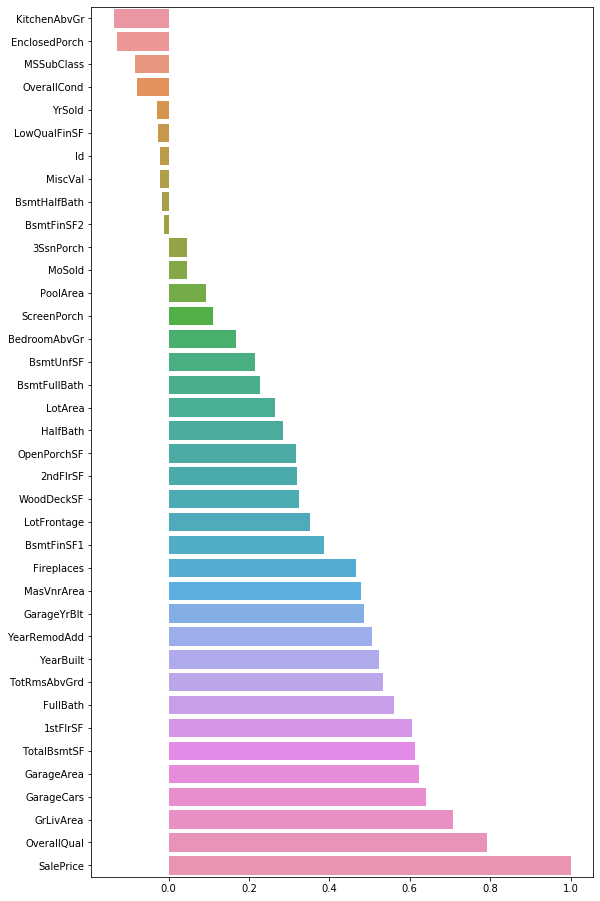

In [123]:
# correlation Barplot
plt.figure(figsize=(9,16))
corr_feat_series = pd.Series.sort_values(train.corrwith(train.SalePrice))
sns.barplot(x=corr_feat_series, y=corr_feat_series.index, orient='h')

In [124]:
df_back1 = df_back

In [127]:
df_back1.to_csv('df_for_feature_engineering.csv', index=False)

In [130]:
list(corr_feat_series.index)

['KitchenAbvGr',
 'EnclosedPorch',
 'MSSubClass',
 'OverallCond',
 'YrSold',
 'LowQualFinSF',
 'Id',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2',
 '3SsnPorch',
 'MoSold',
 'PoolArea',
 'ScreenPorch',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotArea',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'LotFrontage',
 'BsmtFinSF1',
 'Fireplaces',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']